# ML - Homework 3

**Author: Marusic Diana (331)**

### Import libraries

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import os
import cv2

from skimage import data
from skimage import filters
from skimage import measure
import math
from skimage import exposure

from data_generator import training_generator,test_generator

## Generate training samples

In [0]:
NR_SAMPLES = 100
generator = training_generator(batch_size=NR_SAMPLES) # batch size of 8

x, numbers, numbers_sum = next(generator)

In [23]:
print(numbers[0:3])
print(numbers_sum[0:3])
# print(x[0:3])
print(x.shape)

[[ 67  80]
 [164   8]
 [254 215]]
[[147]
 [172]
 [469]]
(100, 2, 28, 84)


### Plot generated images

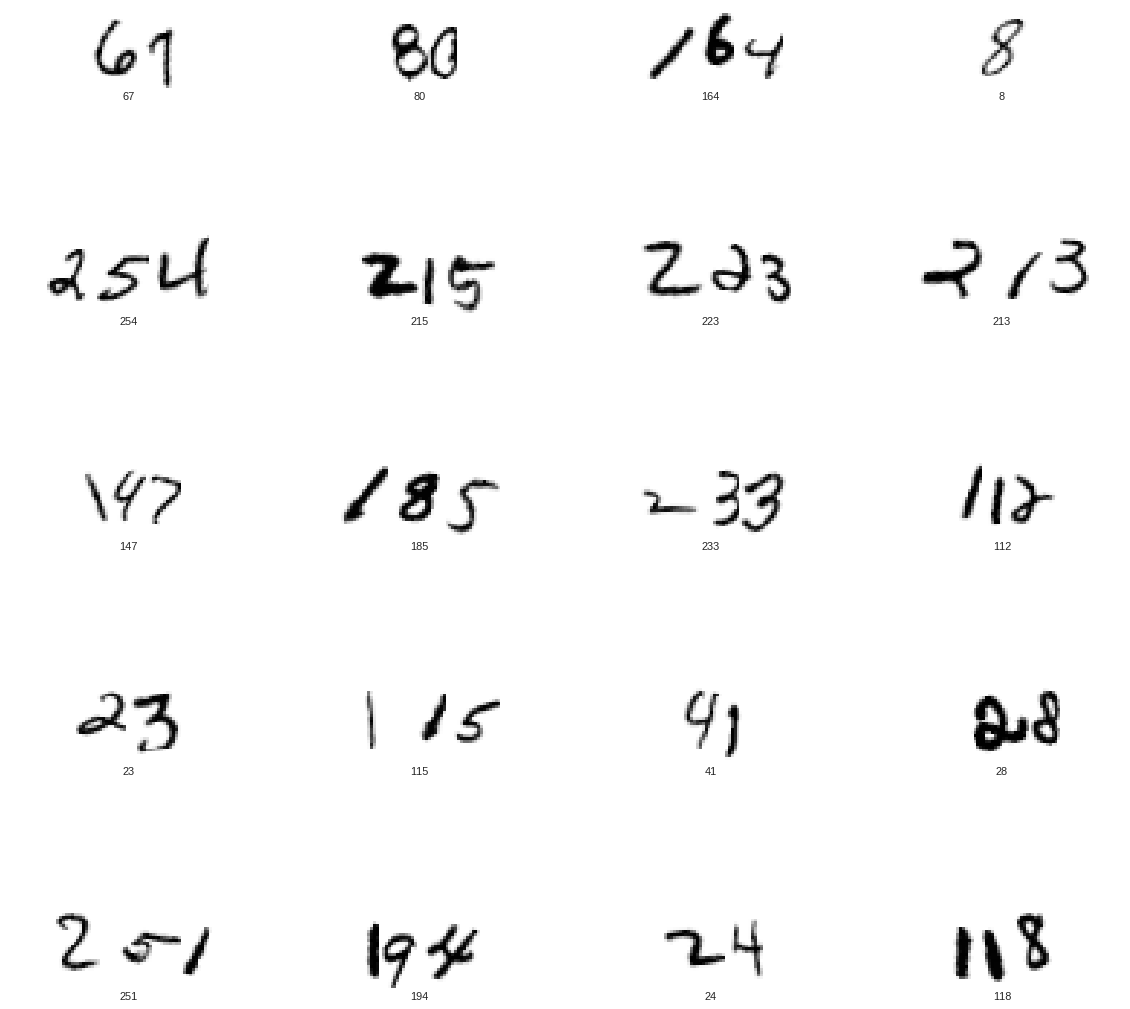

In [30]:

x_train = x
y_train = numbers


plt.figure(figsize=(20,20))
nr = 0

for i in range(min(len(y_train),10)):
  for j in range(2):
    plt.subplot(5,4,nr+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x[i][j])    
    plt.xlabel(y_train[i][j])
    nr+=1


### Separate columns

In [53]:
def separate_columns(X, numbers):
  X_first = x[:,:1]
  X_second = x[:,1:]
  numbers_first = numbers[:,:1]
  numbers_second = numbers[:,1:]
  
  return X_first, X_second, numbers_first, numbers_second
  
x_first, x_second, numbers_first, numbers_second = separate_columns(x, numbers)

print("First column of numbers:")
print(numbers_first[0:3])
# print(x_first[0:3])
print("x_first shape:")
print(x_first.shape)

print("Second column of numbers:")
print(numbers_second[0:3])
# print(x_second[0:3])
print("x_second shape:")
print(x_second.shape)



First column of numbers:
[[ 67]
 [164]
 [254]]
x_first shape:
(100, 1, 28, 84)
Second column of numbers:
[[ 80]
 [  8]
 [215]]
x_second shape:
(100, 1, 28, 84)


In [0]:
# print(x_first[0])
# print(x[0])
x_first = x_first.reshape((NR_SAMPLES,28,84))


### Function to return number of digits in an integer

In [0]:

def nrOfDigits(n):
  if n<10:
    return 1
  return int(math.log10(n))+1


### Digits segmentation

## TODO:  use function for one example and change function to use sigma and identify the best sigma

### TODO: choose only correct segmented examples for training the neural network

[0 1 2]
67
2
28
Correct!


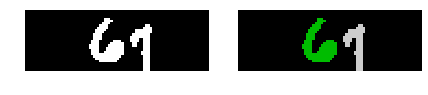

[0 1 2 3]
164
3
28
Correct!


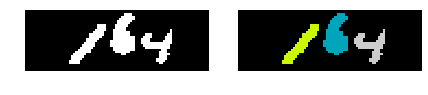

[0 1 2 3]
254
3
28
Correct!


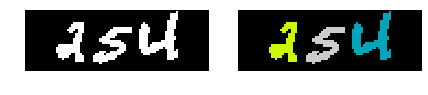

[0 1 2 3]
223
3
28
Correct!


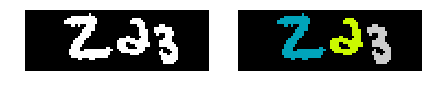

[0 1 2 3]
147
3
28
Correct!


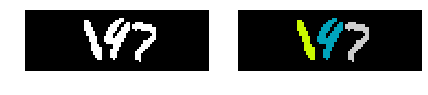

[0 1 2]
233
3
28
Wrong!


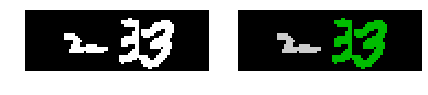

[0 1 2]
23
2
28
Correct!


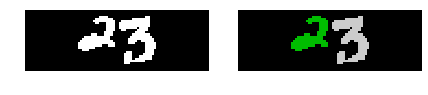

[0 1 2]
41
2
28
Correct!


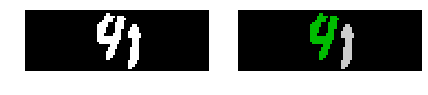

[0 1 2 3]
251
3
28
Correct!


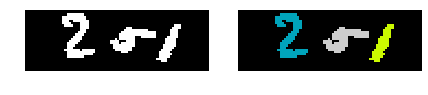

[0 1 2]
24
2
28
Correct!


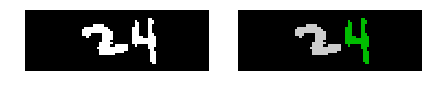

[0 1 2]
51
2
28
Correct!


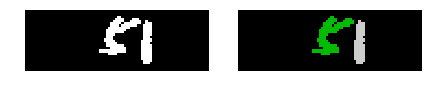

[0 1 2]
31
2
28
Correct!


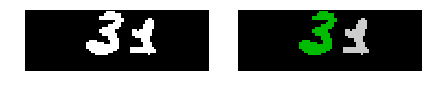

[0 1 2]
22
2
28
Correct!


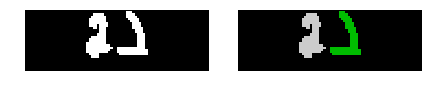

[0 1 2 3]
247
3
28
Correct!


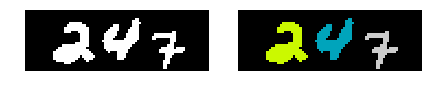

[0 1]
9
1
28
Correct!


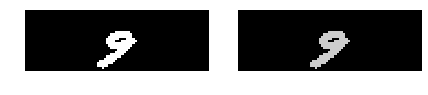

[0 1 2 3]
160
3
28
Correct!


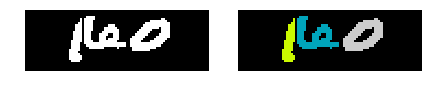

[0 1 2]
39
2
28
Correct!


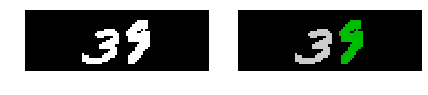

[0 1 2 3]
108
3
28
Correct!


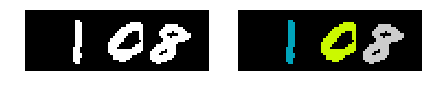

[0 1 2 3]
206
3
28
Correct!


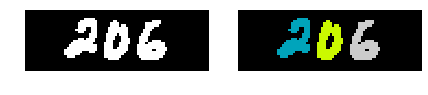

[0 1 2]
52
2
28
Correct!


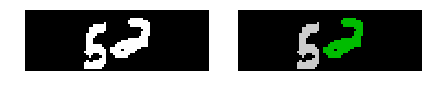

Correct segmented numbers:
19 out of 20
0.95 %
[0 1 2]
67
2
28
Correct!


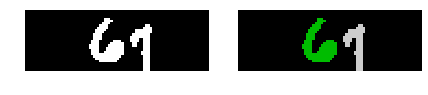

[0 1 2 3]
164
3
28
Correct!


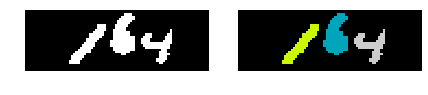

[0 1 2 3]
254
3
28
Correct!


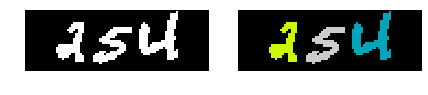

[0 1 2 3]
223
3
28
Correct!


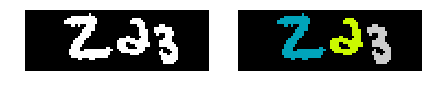

[0 1 2 3]
147
3
28
Correct!


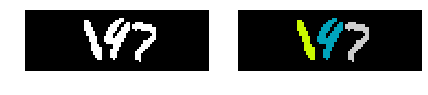

[0 1 2]
233
3
28
Wrong!


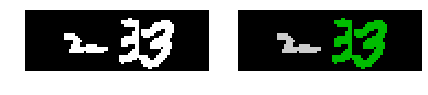

[0 1 2]
23
2
28
Correct!


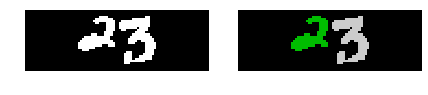

[0 1 2]
41
2
28
Correct!


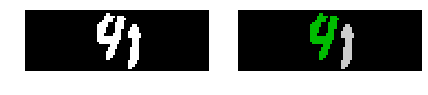

[0 1 2 3]
251
3
28
Correct!


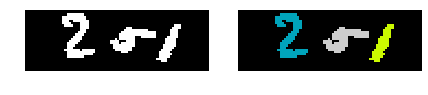

[0 1 2]
24
2
28
Correct!


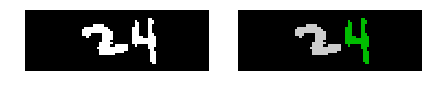

[0 1 2]
51
2
28
Correct!


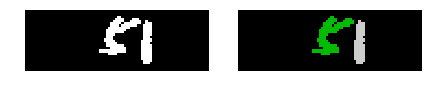

[0 1 2]
31
2
28
Correct!


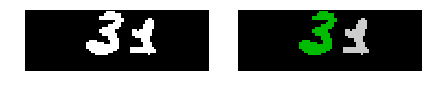

[0 1 2]
22
2
28
Correct!


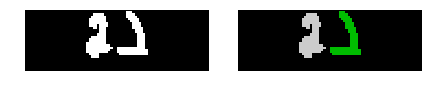

[0 1 2 3]
247
3
28
Correct!


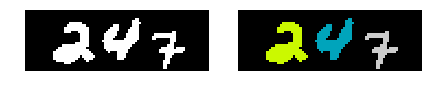

[0 1]
9
1
28
Correct!


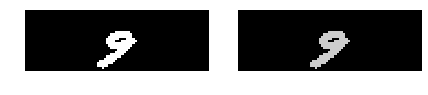

[0 1 2 3]
160
3
28
Correct!


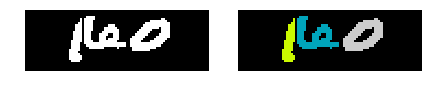

[0 1 2]
39
2
28
Correct!


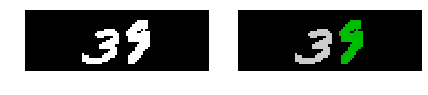

[0 1 2 3]
108
3
28
Correct!


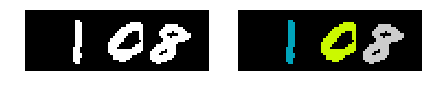

[0 1 2 3]
206
3
28
Correct!


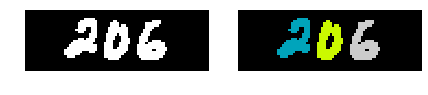

[0 1 2]
52
2
28
Correct!


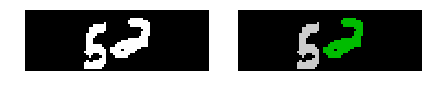

Correct segmented numbers:
19 out of 20
0.95 %
[0 1 2]
67
2
28
Correct!


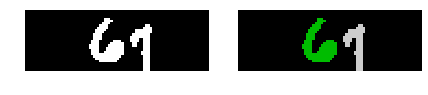

[0 1 2 3]
164
3
28
Correct!


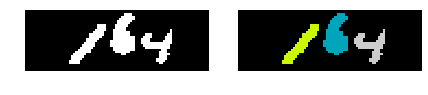

[0 1 2 3]
254
3
28
Correct!


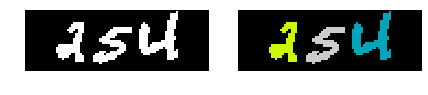

[0 1 2 3]
223
3
28
Correct!


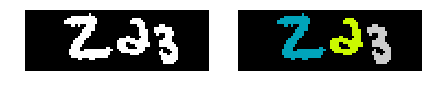

[0 1 2 3]
147
3
28
Correct!


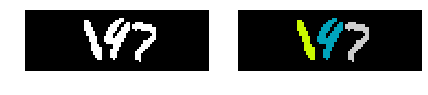

[0 1 2]
233
3
28
Wrong!


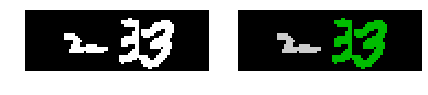

[0 1 2]
23
2
28
Correct!


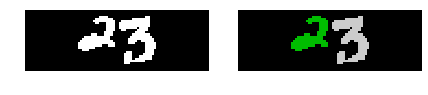

[0 1 2]
41
2
28
Correct!


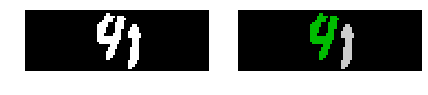

[0 1 2 3]
251
3
28
Correct!


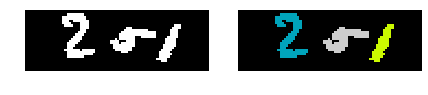

[0 1 2]
24
2
28
Correct!


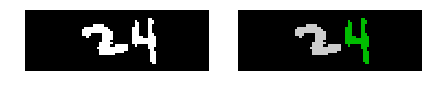

[0 1 2]
51
2
28
Correct!


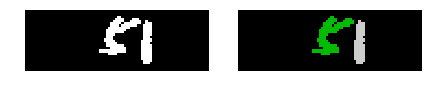

[0 1 2]
31
2
28
Correct!


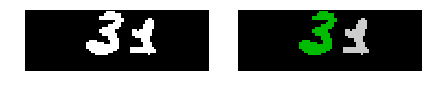

[0 1 2]
22
2
28
Correct!


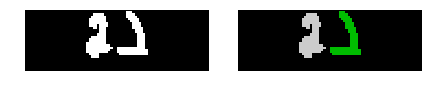

[0 1 2 3]
247
3
28
Correct!


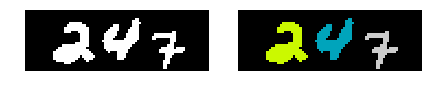

[0 1]
9
1
28
Correct!


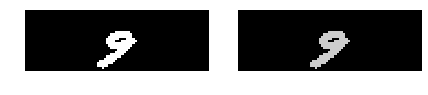

[0 1 2 3]
160
3
28
Correct!


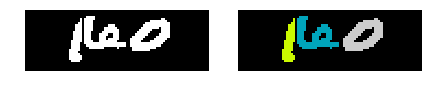

[0 1 2]
39
2
28
Correct!


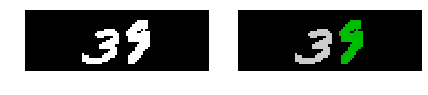

[0 1 2 3]
108
3
28
Correct!


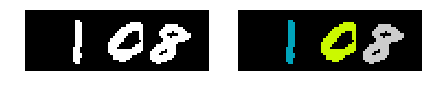

[0 1 2 3]
206
3
28
Correct!


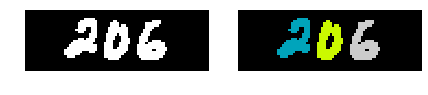

[0 1 2]
52
2
28
Correct!


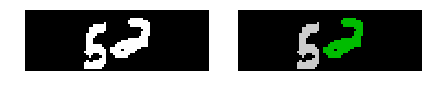

Correct segmented numbers:
19 out of 20
0.95 %
[0 1 2]
67
2
28
Correct!


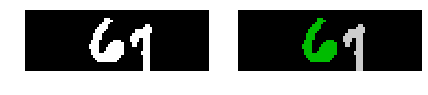

[0 1 2 3]
164
3
28
Correct!


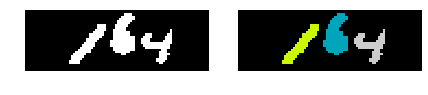

[0 1 2 3]
254
3
28
Correct!


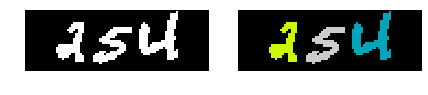

[0 1 2 3]
223
3
28
Correct!


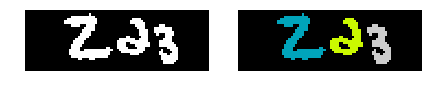

[0 1 2 3]
147
3
28
Correct!


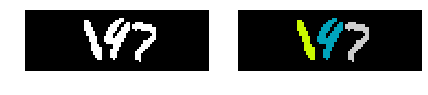

[0 1 2]
233
3
28
Wrong!


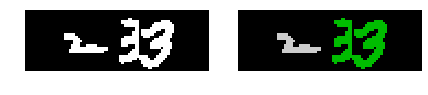

[0 1 2]
23
2
28
Correct!


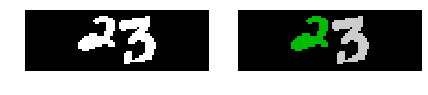

[0 1 2]
41
2
28
Correct!


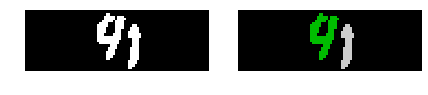

[0 1 2 3]
251
3
28
Correct!


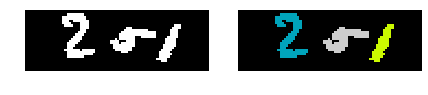

[0 1 2]
24
2
28
Correct!


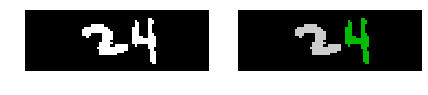

[0 1 2]
51
2
28
Correct!


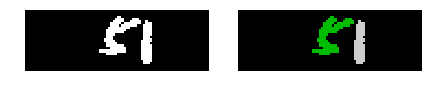

[0 1 2]
31
2
28
Correct!


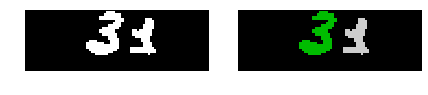

[0 1 2]
22
2
28
Correct!


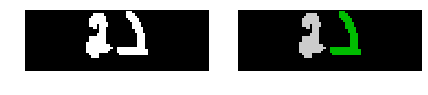

[0 1 2 3]
247
3
28
Correct!


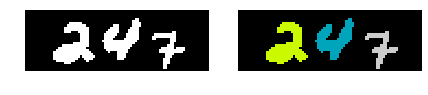

[0 1]
9
1
28
Correct!


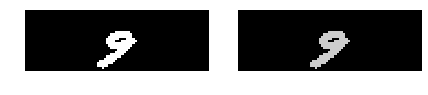

[0 1 2 3]
160
3
28
Correct!


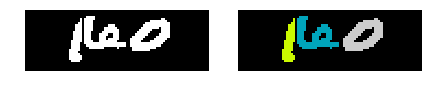

[0 1 2]
39
2
28
Correct!


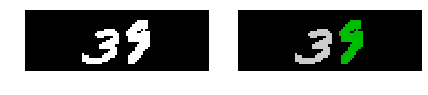

[0 1 2 3]
108
3
28
Correct!


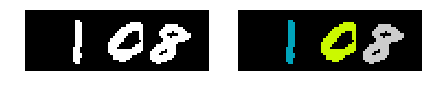

[0 1 2 3]
206
3
28
Correct!


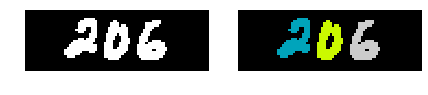

[0 1 2]
52
2
28
Correct!


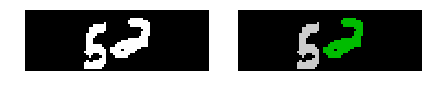

Correct segmented numbers:
19 out of 20
0.95 %
[0 1 2]
67
2
28
Correct!


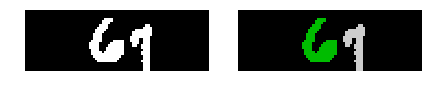

[0 1 2 3]
164
3
28
Correct!


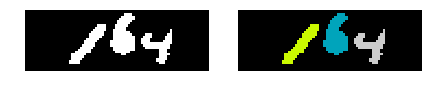

[0 1 2 3]
254
3
28
Correct!


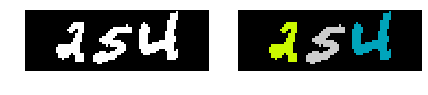

[0 1 2 3]
223
3
28
Correct!


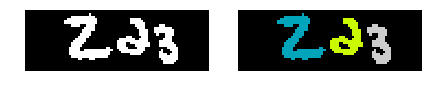

[0 1 2 3]
147
3
28
Correct!


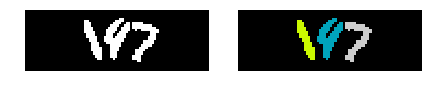

[0 1 2]
233
3
28
Wrong!


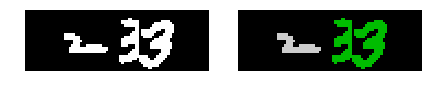

[0 1 2]
23
2
28
Correct!


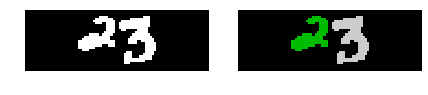

[0 1 2]
41
2
28
Correct!


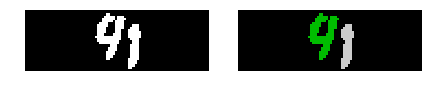

[0 1 2 3]
251
3
28
Correct!


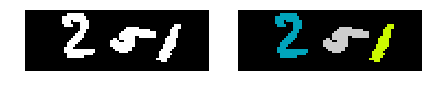

[0 1 2]
24
2
28
Correct!


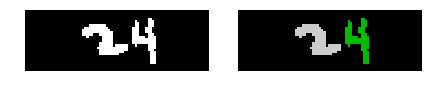

[0 1 2]
51
2
28
Correct!


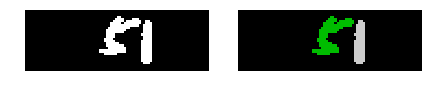

[0 1 2]
31
2
28
Correct!


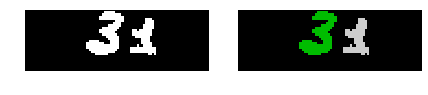

[0 1 2]
22
2
28
Correct!


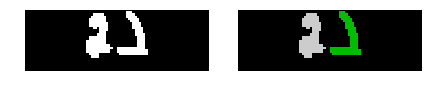

[0 1 2 3]
247
3
28
Correct!


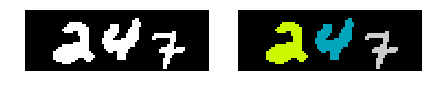

[0 1]
9
1
28
Correct!


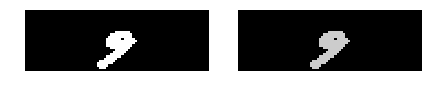

[0 1 2 3]
160
3
28
Correct!


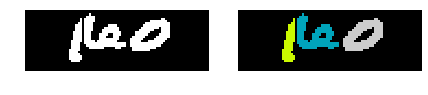

[0 1 2]
39
2
28
Correct!


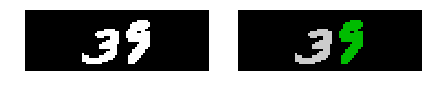

[0 1 2 3]
108
3
28
Correct!


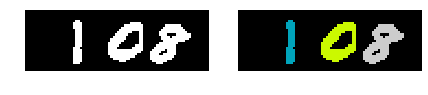

[0 1 2 3]
206
3
28
Correct!


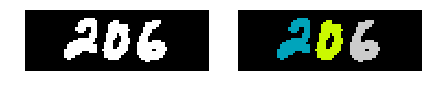

[0 1 2]
52
2
28
Correct!


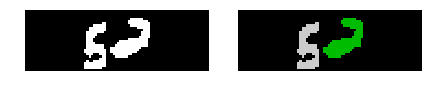

Correct segmented numbers:
19 out of 20
0.95 %
[0 1 2]
67
2
28
Correct!


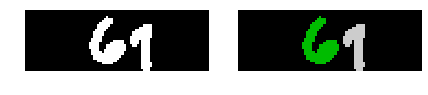

[0 1 2 3]
164
3
28
Correct!


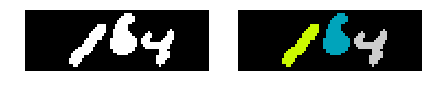

[0 1 2 3]
254
3
28
Correct!


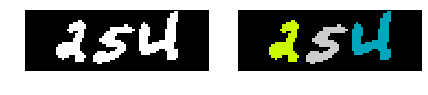

[0 1 2 3]
223
3
28
Correct!


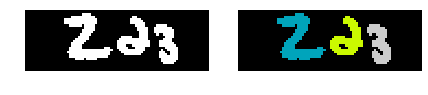

[0 1 2]
147
3
28
Wrong!


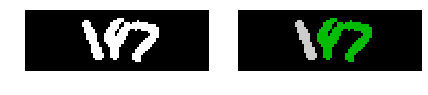

[0 1 2]
233
3
28
Wrong!


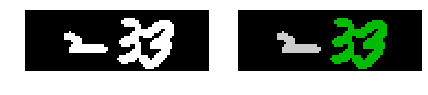

[0 1 2]
23
2
28
Correct!


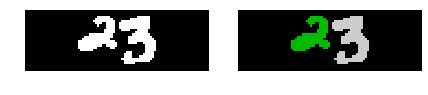

[0 1 2]
41
2
28
Correct!


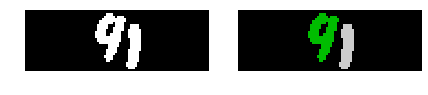

[0 1 2 3]
251
3
28
Correct!


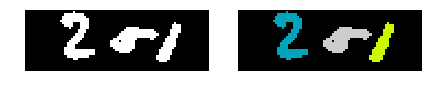

[0 1 2]
24
2
28
Correct!


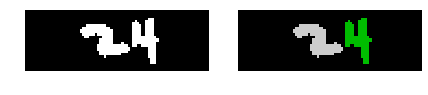

[0 1 2]
51
2
28
Correct!


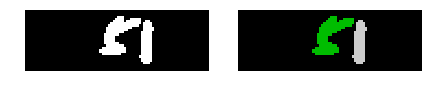

[0 1 2]
31
2
28
Correct!


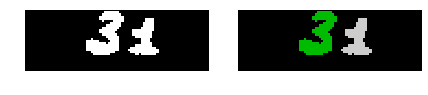

[0 1 2]
22
2
28
Correct!


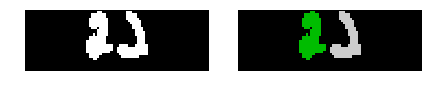

[0 1 2 3]
247
3
28
Correct!


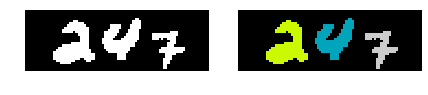

[0 1]
9
1
28
Correct!


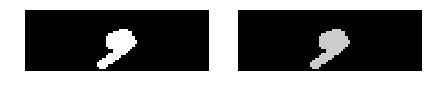

[0 1 2]
160
3
28
Wrong!


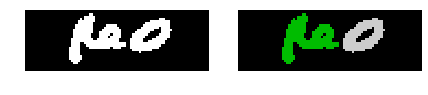

[0 1 2]
39
2
28
Correct!


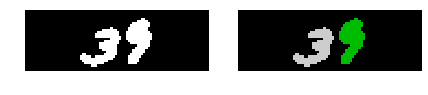

[0 1 2 3]
108
3
28
Correct!


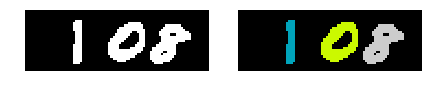

[0 1 2 3]
206
3
28
Correct!


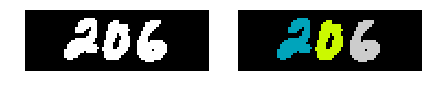

[0 1 2]
52
2
28
Correct!


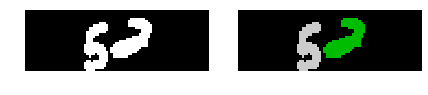

Correct segmented numbers:
17 out of 20
0.85 %
[0 1 2]
67
2
28
Correct!


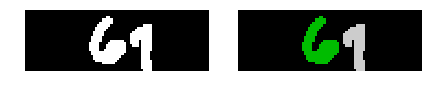

[0 1 2 3]
164
3
28
Correct!


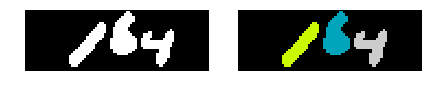

[0 1 2 3]
254
3
28
Correct!


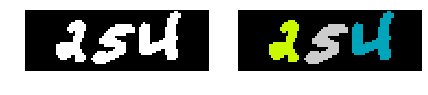

[0 1 2 3]
223
3
28
Correct!


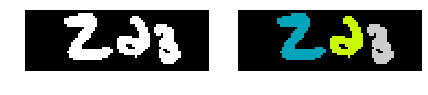

[0 1 2]
147
3
28
Wrong!


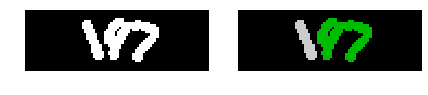

[0 1 2]
233
3
28
Wrong!


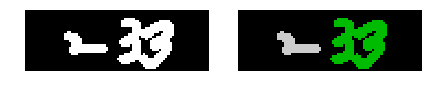

[0 1 2]
23
2
28
Correct!


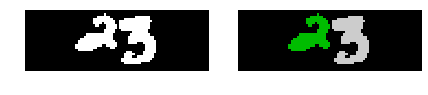

[0 1 2]
41
2
28
Correct!


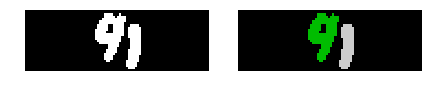

[0 1 2 3]
251
3
28
Correct!


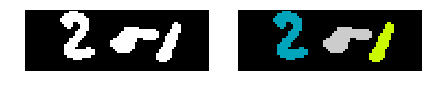

[0 1 2]
24
2
28
Correct!


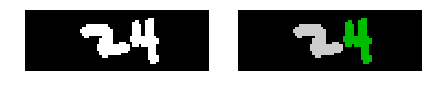

[0 1 2]
51
2
28
Correct!


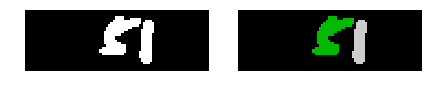

[0 1 2]
31
2
28
Correct!


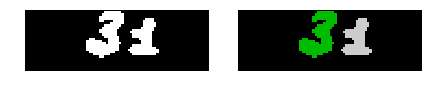

[0 1 2]
22
2
28
Correct!


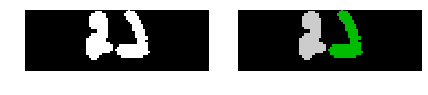

[0 1 2 3]
247
3
28
Correct!


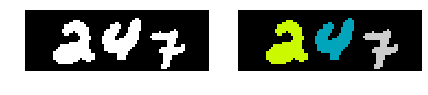

[0 1]
9
1
28
Correct!


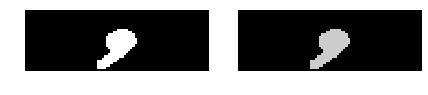

[0 1 2]
160
3
28
Wrong!


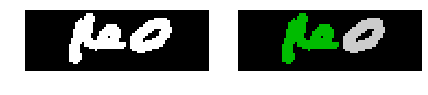

[0 1 2]
39
2
28
Correct!


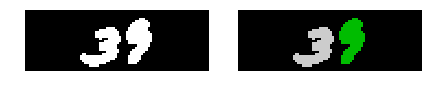

[0 1 2 3]
108
3
28
Correct!


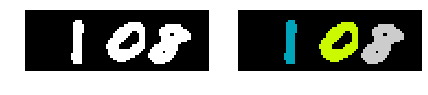

[0 1 2 3]
206
3
28
Correct!


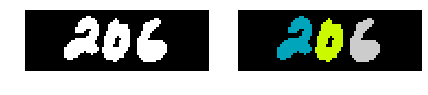

[0 1]
52
2
28
Wrong!


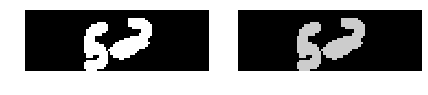

Correct segmented numbers:
16 out of 20
0.8 %


In [137]:
nr_correct_segments = []
percentage_segments = []

sigma_values = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
for sigma in sigma_values:

  nr_correct_segment = 0

  array_of_images = x_first[0:20]

  for (idx, im) in enumerate(array_of_images):
    im = filters.gaussian(im, sigma=sigma)

    blobs = im > 0.7 * im.mean()

    all_labels = measure.label(blobs)
    blobs_labels = measure.label(blobs, background=0)
    print(np.unique(blobs_labels))
    print(y_train[idx][0])
    nr_digits = nrOfDigits(y_train[idx][0])
    print(nr_digits)
    print(len(blobs_labels))

    if len(np.unique(blobs_labels)) == nr_digits+1:
      print("Correct!")
      nr_correct_segment += 1
    else:
      print("Wrong!")

    plt.figure(figsize=(9, 3.5))
    plt.subplot(131)
    plt.imshow(blobs, cmap='gray')
    plt.axis('off')
    plt.subplot(132)
    plt.imshow(blobs_labels, cmap='nipy_spectral')
    plt.axis('off')
#     plt.subplot(133)
#     plt.imshow(blobs_labels, cmap='hot')
#     plt.axis('off')

    plt.tight_layout()
    plt.show()

  print("Correct segmented numbers:")
  print(nr_correct_segment, 'out of', len(array_of_images))
  percentage_segment = (0.0+nr_correct_segment)/len(array_of_images)
  print(percentage_segment, '%')
  
  nr_correct_segments.append(nr_correct_segment)
  percentage_segments.append(percentage_segment)



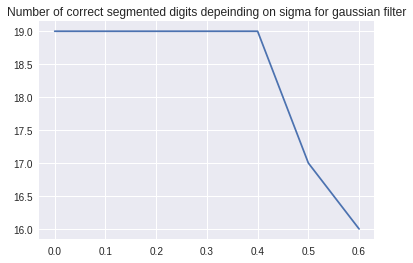

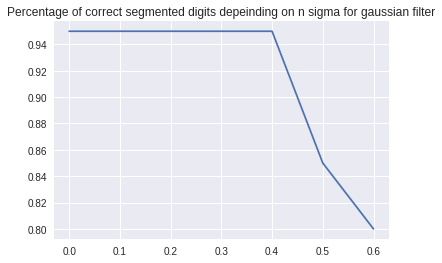

In [163]:
plt.plot(sigma_values, nr_correct_segments)
plt.title("Number of correct segmented digits depeinding on sigma for gaussian filter")
plt.show()

plt.plot(sigma_values, percentage_segments)
plt.title("Percentage of correct segmented digits depeinding on n sigma for gaussian filter")
plt.show()

Will choose n = 200, because after this value, performance does not improve

## Create a function to segment digits, using the best sigma parameter identified

In [0]:
def segment_image(im, number):

  sigma=0.1
  
  im = filters.gaussian(im, sigma=sigma)
  blobs = im > 0.9 * im.mean()

  blobs_labels = measure.label(blobs, background=0)
  distinct_labels = np.unique(blobs_labels)
  
  print(distinct_labels)
  print(number)
  nr_digits = nrOfDigits(number)
  print(nr_digits)
  print(len(blobs_labels))

  if len(distinct_labels) == nr_digits+1:
    print("Correct!")
  else:
    print("Wrong!")

  plt.figure(figsize=(9, 3.5))
  plt.subplot(131)
  plt.imshow(blobs, cmap='gray')
  plt.axis('off')
  plt.subplot(132)
  plt.imshow(blobs_labels, cmap='nipy_spectral')
  plt.axis('off')
  plt.subplot(133)
  plt.imshow(blobs_labels, cmap='hot')
  plt.axis('off')

  plt.tight_layout()
  plt.show()

  image_digits = []
  
  for (i,label) in enumerate(distinct_labels[1:]):
    image_digit = np.where(blobs_labels==label, blobs_labels, 0)
    image_digits.append(image_digit)
    
  
  return image_digits
  
  
  
  

[0 1 2 3]
[164]
3
28
Correct!


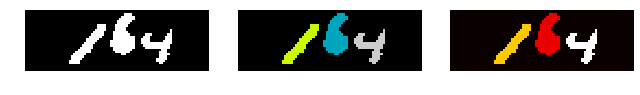

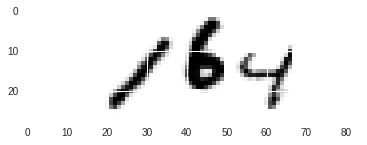

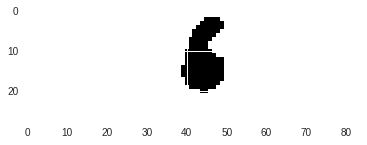

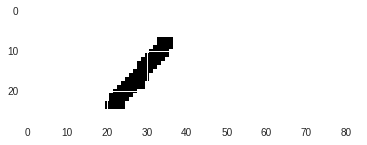

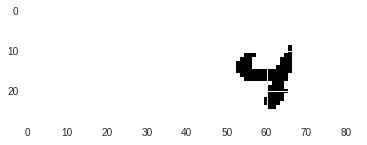

In [165]:
image_digits = segment_image(x_first[1], numbers_first[1])

plt.imshow(x_first[1])
plt.show()
  
for image_digit in image_digits:
    plt.imshow(image_digit)
    plt.show()

### Use a version of the segment image function with transposed images to identify digits in the correct order of their appearance (from left to right)

In [0]:
from skimage import data
from skimage import filters
from skimage import measure
import math
from skimage import exposure


def segment_image_transpose(im, number, train=True):
  sigma = 0.1

  nr_correct_segment = 0
  
  im = np.transpose(im)
  
  im = filters.gaussian(im, sigma=sigma)
  blobs = im > 0.7 * im.mean()

  blobs_labels = measure.label(blobs, background=0)
  distinct_labels = np.unique(blobs_labels)
  
  print(distinct_labels)
  print(number)
  nr_digits = nrOfDigits(number)
  print(nr_digits)
  print(len(blobs_labels))

  if len(distinct_labels) == nr_digits+1:
    print("Correct!")
  else:
    print("Wrong!")

  plt.figure(figsize=(9, 3.5))
  plt.subplot(131)
  plt.imshow(np.transpose(blobs), cmap='gray')
  plt.axis('off')
  plt.subplot(132)
  plt.imshow(np.transpose(blobs_labels), cmap='nipy_spectral')
  plt.axis('off')
  plt.subplot(133)
  plt.imshow(np.transpose(blobs_labels), cmap='hot')
  plt.axis('off')

  plt.tight_layout()
  plt.show()

  image_digits = []
  
  for (i,label) in enumerate(distinct_labels[1:]):
    image_digit = np.where(blobs_labels==label, blobs_labels, 0)
    image_digits.append(np.transpose(image_digit))
    
  
  return image_digits
  
  
  
  

[0 1 2 3]
[164]
3
84
Correct!


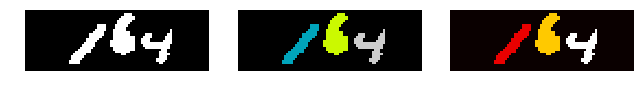

In [167]:
image_digits = segment_image_transpose(x_first[1], numbers_first[1])

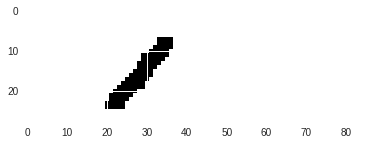

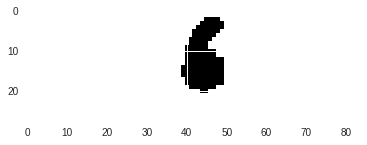

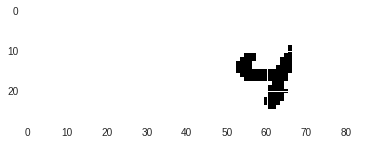

In [168]:
for image_digit in image_digits:
    plt.imshow(image_digit)
    plt.show()

In [0]:
def segment_image_transpose_test(im):
  sigma = 0.33

  nr_correct_segment = 0
  
  im = np.transpose(im)
  
  im = filters.gaussian(im, sigma=sigma)
  blobs = im > 0.7 * im.mean()

  blobs_labels = measure.label(blobs, background=0)
  distinct_labels = np.unique(blobs_labels)
  
  image_digits = []
  
  for (i,label) in enumerate(distinct_labels[1:]):
    image_digit = np.where(blobs_labels==label, blobs_labels, 0)
    image_digits.append(np.transpose(image_digit))
    
  
  return image_digits  
  

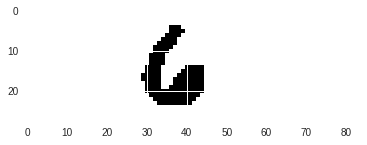

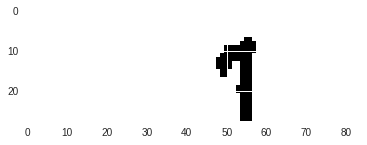

[67]


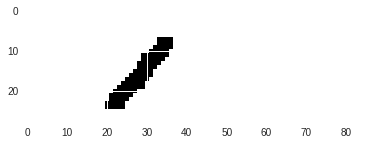

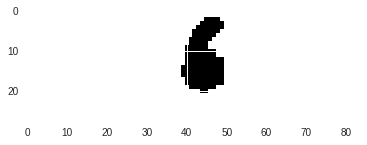

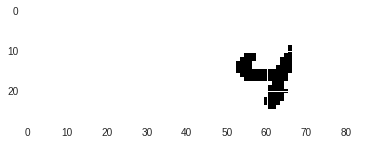

[164]


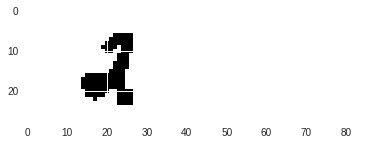

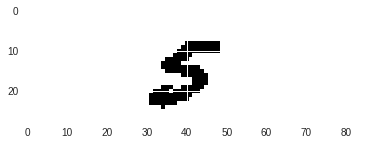

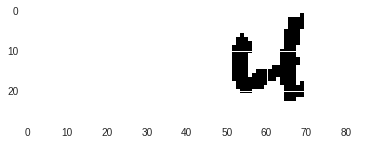

[254]


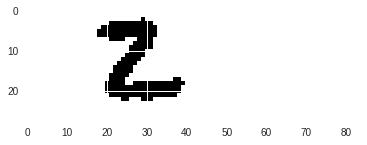

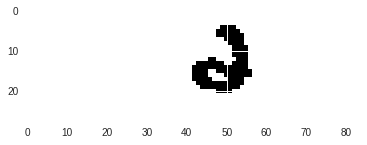

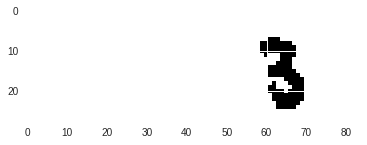

[223]


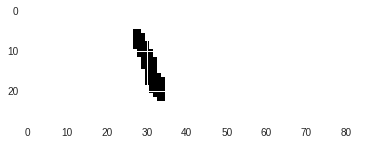

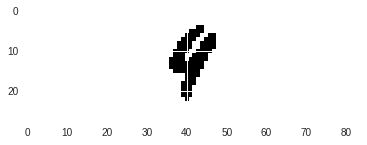

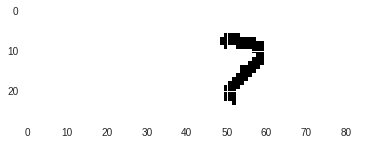

[147]


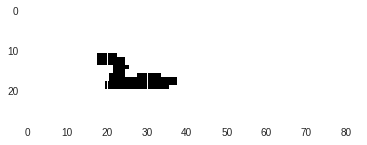

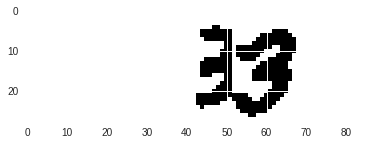

[233]


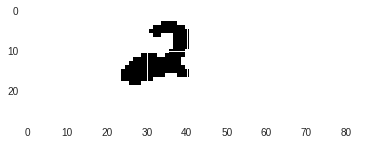

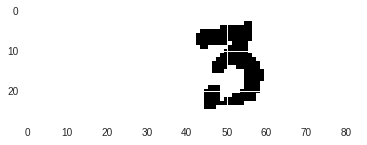

[23]


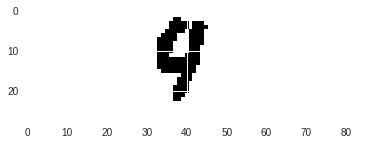

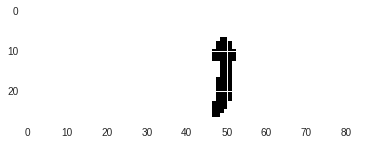

[41]


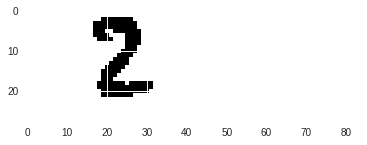

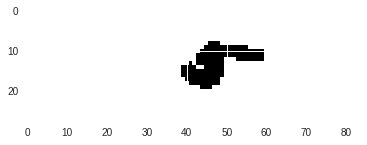

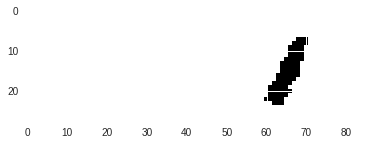

[251]


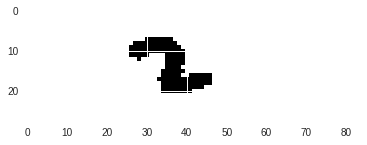

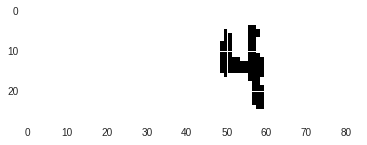

[24]


In [170]:
for (idx, image) in enumerate(x_first[0:10]):
  image_digits = segment_image_transpose_test(image)
  for image_digit in image_digits:
      plt.imshow(image_digit)
      plt.show()
  print(numbers_first[idx])

### TODO: image segmentation + train + test pe tot setul de date
